<a href="https://colab.research.google.com/github/RuthNduta/World-Suicide-Rates-in-SQL/blob/main/World_Suicide_Rate_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PYTHON DATA CLEANING, OUTLIERS AND ANALYTICS**

# **1. Importing Libraries**

In [1]:
# Importing the pandas library
import pandas as pd

# Importing the numpy library
import numpy as np

#Importing matplotlib
import matplotlib.pyplot as plt

# importing seaborn
import seaborn as sns

# **2. Reading the Dataset from our CSV file**

The dataset we will use contains suicide cases from different countries in the world with different generations, age groups and other factors as outlined below.

In [2]:
#Reading the data from the CSV file and create the dataframe to be used
df = pd.read_csv('/content/master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987.0,male,15-24 years,21.0,312900.0,6.71,Albania1987,NaN,"2,156,624,900",796.0,Generation X
1,Albania,1987.0,male,35-54 years,16.0,308000.0,5.19,Albania1987,NaN,"2,156,624,900",796.0,Silent
2,Albania,1987.0,female,15-24 years,14.0,289700.0,4.83,Albania1987,NaN,"2,156,624,900",796.0,Generation X
3,Albania,1987.0,male,75+ years,1.0,21800.0,4.59,Albania1987,NaN,"2,156,624,900",796.0,G.I. Generation
4,Albania,1987.0,male,25-34 years,9.0,274300.0,3.28,Albania1987,NaN,"2,156,624,900",796.0,Boomers


In [3]:
df.shape

(11009, 12)

# **3. Data Understanding**

We might need to convert columns to the respective datatypes ie. columns we could convert them from string to float. This observation can be made by accessing information about the dataset.

In [5]:
#Getting the information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11009 entries, 0 to 11008
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             11009 non-null  object 
 1   year                11008 non-null  float64
 2   sex                 11008 non-null  object 
 3   age                 11008 non-null  object 
 4   suicides_no         11008 non-null  float64
 5   population          11008 non-null  float64
 6   suicides/100k pop   11008 non-null  float64
 7   country-year        11008 non-null  object 
 8   HDI for year        3340 non-null   float64
 9    gdp_for_year ($)   11008 non-null  object 
 10  gdp_per_capita ($)  11008 non-null  float64
 11  generation          11008 non-null  object 
dtypes: float64(6), object(6)
memory usage: 1.0+ MB


# **4. Data Cleaning**

Let us perform data cleaning procedures below providing a documentation for our actions. We will perform as many data cleaning procedures as we think suitable for the various dimensions of data.

**4.1 Validity**

In [6]:
#dropping the country-year column since we have years and country column
df.drop('country-year', axis=1, inplace=True)

**4.2 Accuracy**

In [7]:
#Checking if there is any missing data without a country 
df.country.isna().sum()

0

**4.3 Completeness**

In [8]:
#identifying the the presence of the missing values
df.isna().sum()

country                  0
year                     1
sex                      1
age                      1
suicides_no              1
population               1
suicides/100k pop        1
HDI for year          7669
 gdp_for_year ($)        1
gdp_per_capita ($)       1
generation               1
dtype: int64

In [9]:
#dropping the HDI for year since it has most missing values
df.drop('HDI for year', axis=1, inplace=True)


In [10]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987.0,male,15-24 years,21.0,312900.0,6.71,"2,156,624,900",796.0,Generation X
1,Albania,1987.0,male,35-54 years,16.0,308000.0,5.19,"2,156,624,900",796.0,Silent
2,Albania,1987.0,female,15-24 years,14.0,289700.0,4.83,"2,156,624,900",796.0,Generation X
3,Albania,1987.0,male,75+ years,1.0,21800.0,4.59,"2,156,624,900",796.0,G.I. Generation
4,Albania,1987.0,male,25-34 years,9.0,274300.0,3.28,"2,156,624,900",796.0,Boomers


**4.4 Consistency**

In [11]:
#checking for duplicates
df.duplicated().sum()

0

**4.5 Uniformity**

In [12]:
#Renaming column 'gdp_for_year ($): Gdp_for
#to resolve syntax errors

df.columns.values[7] = 'Gdp'

#creating variable df1 for the renamed dataset
df1 = df.rename(columns= {'country': 'Country', 'year': 'Year', 'sex': 'Sex', 'age': 'Age', 
                          'suicides_no': 'Suicides_no', 'population': 'Population', 'suicides/100k pop': 'Suicides_per_hundred_thousand_pop', 
                          'Gdp': 'Gdp_for_year', 'gdp_per_capita ($)': 'Gdp_per_capita', 'generation': 'Generation'})
df1.head(2)

,Country,Year,Sex,Age,Suicides_no,Population,Suicides_per_hundred_thousand_pop,Gdp_for_year,Gdp_per_capita,Generation
0,Albania,1987.0,male,15-24 years,21.0,312900.0,6.71,"2,156,624,900",796.0,Generation X
1,Albania,1987.0,male,35-54 years,16.0,308000.0,5.19,"2,156,624,900",796.0,Silent


In [13]:
#Changing the datatype of the column Gdp_for_year and removing the commas
df1['Gdp_for_year']=df1['Gdp_for_year'].str.replace(',','').astype('float')
df1.head(3)

,Country,Year,Sex,Age,Suicides_no,Population,Suicides_per_hundred_thousand_pop,Gdp_for_year,Gdp_per_capita,Generation
0,Albania,1987.0,male,15-24 years,21.0,312900.0,6.71,2.156625e+09,796.0,Generation X
1,Albania,1987.0,male,35-54 years,16.0,308000.0,5.19,2.156625e+09,796.0,Silent
2,Albania,1987.0,female,15-24 years,14.0,289700.0,4.83,2.156625e+09,796.0,Generation X


# **5. Outliers**

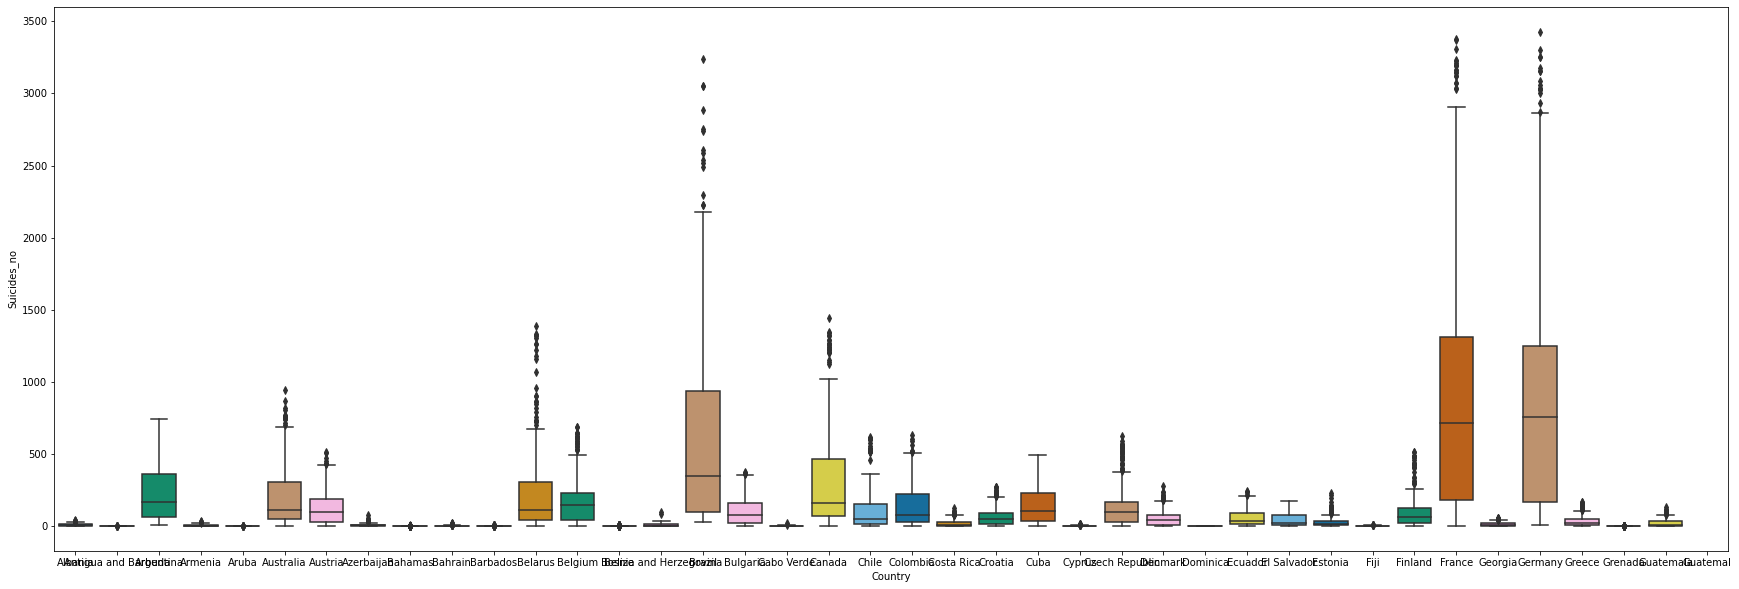

In [14]:
#Checking for outliers in the Suicides column based on the Countries
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10))
sns.boxplot(y='Suicides_no', x='Country', 
                 data=df1, 
                 palette="colorblind",
                 )

In [15]:
#Removing outliers from the Suicides_no columns that is, the extreme cases
df1.Suicides_no.astype = float
Q1 = df1['Suicides_no'].quantile(0.25)
Q3 = df1['Suicides_no'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df1['Suicides_no'] >= Q1 - 1.5 * IQR) & (df1['Suicides_no'] <= Q3 + 1.5 *IQR)

# creating variable dfz for the removed outliers from the suicide column
dfz = df1.loc[filter]
dfz.shape


(9622, 10)

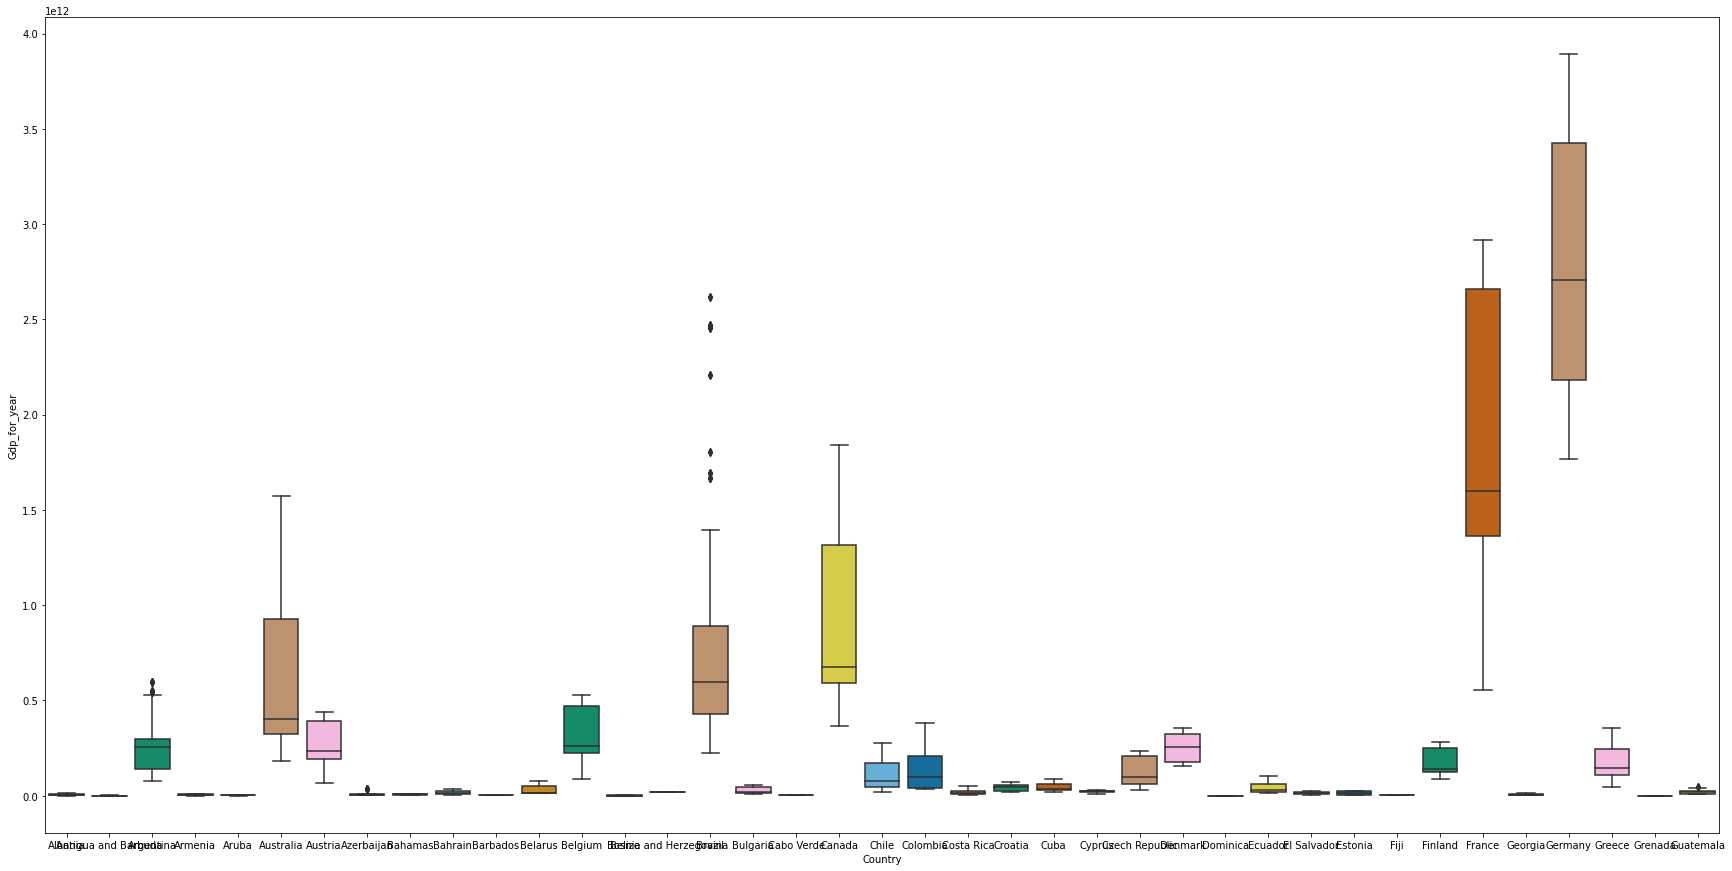

In [17]:
#Checking for outliears in the Gdp_for_year colunn based on the Countries if any
plt.figure(figsize=(30,15))
sns.boxplot(y='Gdp_for_year', x='Country', 
                 data=dfz, 
                 palette="colorblind",
                 )

In [18]:
#Removing outliers from the Gdp_for_year columns that is, the extreme cases
Q1 = dfz['Gdp_for_year'].quantile(0.25)
Q3 = dfz['Gdp_for_year'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (dfz['Gdp_for_year'] >= Q1 - 1.5 * IQR) & (dfz['Gdp_for_year'] <= Q3 + 1.5 *IQR)

# creating variable dfq for the removed outliers from the suicide column
dfq = dfz.loc[filter]
dfq.shape

(8760, 10)

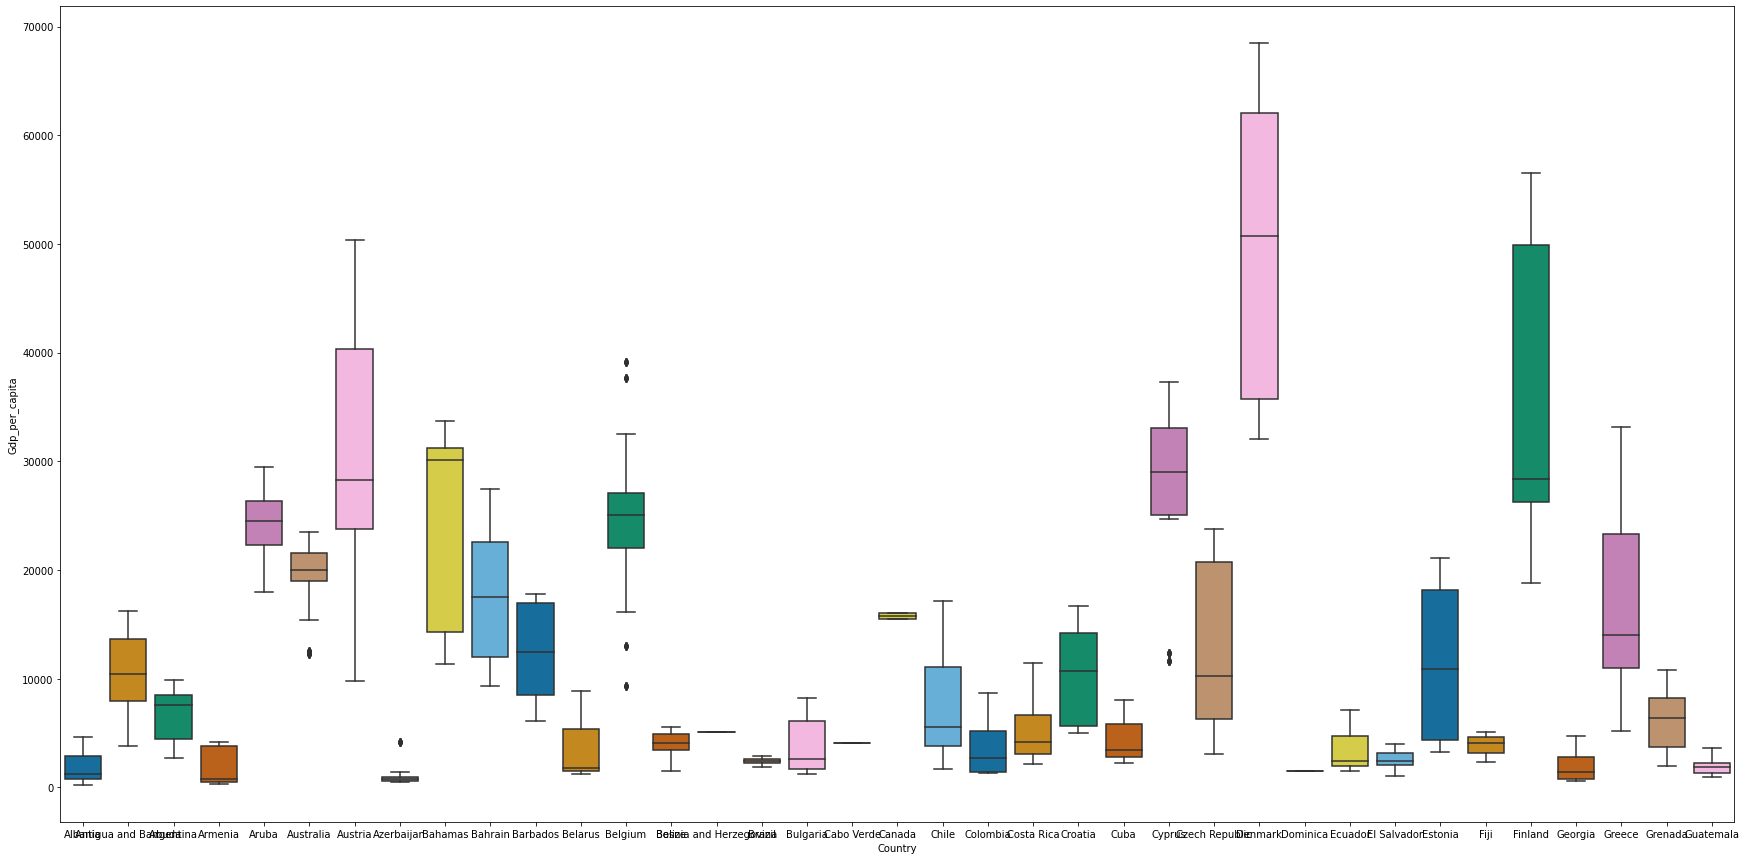

In [19]:
#Checking for outliers in the Gdp_per_capita colunn based on the Countries if there is any
plt.figure(figsize=(30,15))
sns.boxplot(y='Gdp_per_capita', x='Country', 
                 data=dfq, 
                 palette="colorblind",
                 )

In [20]:
#Removing outliers from the Gdp_per_capita columns that is, the extreme cases
Q1 = dfq['Gdp_per_capita'].quantile(0.25)
Q3 = dfq['Gdp_per_capita'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (dfq['Gdp_per_capita'] >= Q1 - 1.5 * IQR) & (dfq['Gdp_per_capita'] <= Q3 + 1.5 *IQR)

# creating variable df2 for the removed outliers from the suicide column
df2 = dfq.loc[filter]
df2.shape

(8388, 10)

In [21]:
#The original data shape before dropping the outliers
df1.shape

(11009, 10)

In [22]:
#Creating a new column to calculate the rate of suicides per generation 
df2['Suicide_rate'] = (df2['Suicides_no']/df2['Population']*100)
df2.head(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Country,Year,Sex,Age,Suicides_no,Population,Suicides_per_hundred_thousand_pop,Gdp_for_year,Gdp_per_capita,Generation,Suicide_rate
0,Albania,1987.0,male,15-24 years,21.0,312900.0,6.71,2.156625e+09,796.0,Generation X,0.006711
1,Albania,1987.0,male,35-54 years,16.0,308000.0,5.19,2.156625e+09,796.0,Silent,0.005195


## **6. Exporting cleaned dataset to CSV**

In [23]:
df2.to_csv('Suicide.csv')

# **7. Analytics**

In [24]:
#1. identifying top 5 countries with the highest suicide cases in the world overall
df3 = df2.groupby(['Country'])['Suicides_no'].sum().sort_values(ascending = False)
df3.head()


Country
Bulgaria     29527.0
Chile        27581.0
Colombia     27149.0
Argentina    26775.0
Cuba         24092.0
Name: Suicides_no, dtype: float64

Text(0, 0.5, 'Suicide cases in numbers')

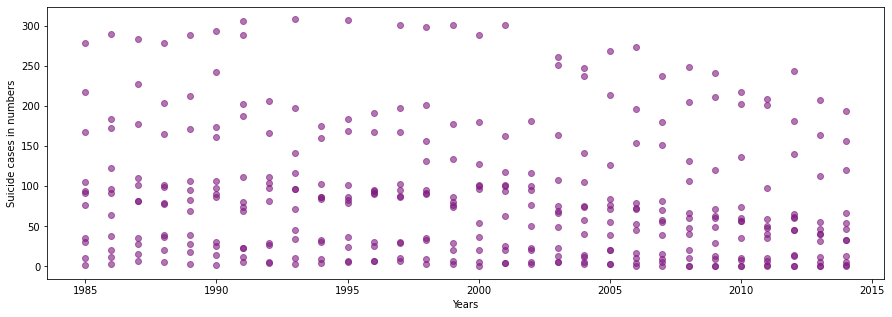

In [25]:
#plotting the scatter plot of the country with the most suicide cases 
df4b = df2.loc[df2['Country'] == 'Bulgaria']
plt.figure(figsize=(15,5))
plt.scatter(df4b.Year, df4b.Suicides_no, color = (0.5,0.1,0.5,0.6))
plt.xlabel('Years')
plt.ylabel('Suicide cases in numbers')


In [26]:
#2. identifying top 5 countries with the lowest suicide cases in the world on overall
dfw = df2.groupby(['Country'])['Suicides_no'].sum()
dfd = dfw.sort_values(ascending = True)
dfd.head(10)

Country
Dominica                    0.0
Antigua and Barbuda        11.0
Grenada                    38.0
Cabo Verde                 42.0
Bahamas                    93.0
Aruba                     101.0
Barbados                  177.0
Fiji                      304.0
Bosnia and Herzegovina    318.0
Belize                    348.0
Name: Suicides_no, dtype: float64

In [27]:
#3(a). identifying the generation with the highest suicide cases on Overall 
df4 = df2.groupby(['Generation'])['Suicide_rate'].sum()
df4 = df4.sort_values(ascending = False)
df4.head()

Generation
Silent             23.892112
G.I. Generation    19.831630
Generation X       14.177935
Boomers            12.234694
Millenials          6.176117
Name: Suicide_rate, dtype: float64

In [28]:
#3(b). identifying the generation with the highest suicide cases before 2000
dfzx = df2.loc[df2['Year'] < 2000]
dfgh = dfzx.groupby(['Generation'])['Suicide_rate'].sum().sort_values(ascending = False)
dfgh

Generation
G.I. Generation    18.292137
Generation X        7.879564
Boomers             6.957737
Silent              5.828492
Millenials          0.237581
Name: Suicide_rate, dtype: float64

In [29]:
#3(c). identifying the generation with the highest suicide cases after 2000
dfzx2 = df2.loc[df2['Year'] >= 2000]
dfgh = dfzx2.groupby(['Generation'])['Suicide_rate'].sum()
dfgh = dfgh.sort_values(ascending = False)
dfgh.head()

Generation
Silent             18.063620
Generation X        6.298371
Millenials          5.938536
Boomers             5.276957
G.I. Generation     1.539493
Name: Suicide_rate, dtype: float64

Text(0, 0.5, 'Suicide rates')

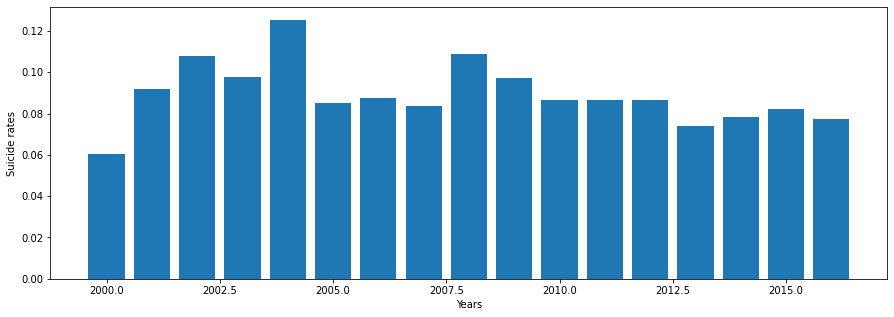

In [30]:
#plotting the bar graph of the generation with the most suicide cases after 2000
dfy = dfzx2.loc[df2['Generation'] == 'Silent']
plt.figure(figsize=(15,5))
plt.bar(dfy.Year, dfy.Suicide_rate)
plt.xlabel('Years')
plt.ylabel('Suicide rates')


In [31]:
#4(a). identifying the generations with the lowest suicide cases on overall
dfr = df2.groupby(['Generation'])['Suicide_rate'].sum()
dfr = df4.sort_values(ascending = True)
dfr.head()

Generation
Generation Z        0.205530
Millenials          6.176117
Boomers            12.234694
Generation X       14.177935
G.I. Generation    19.831630
Name: Suicide_rate, dtype: float64

In [32]:
#4(b). identifying the generation with the lowest suicide cases before 2000
dfzx = df2.loc[df2['Year'] < 2000]
dfgh = dfzx.groupby(['Generation'])['Suicide_rate'].sum()
dfgh = dfgh.sort_values(ascending = True)
dfgh.head()

Generation
Millenials          0.237581
Silent              5.828492
Boomers             6.957737
Generation X        7.879564
G.I. Generation    18.292137
Name: Suicide_rate, dtype: float64

In [33]:
#4(c). identifying the generation with the lowest suicide cases after 2000
dfzx = df2.loc[df2['Year'] >= 2000]
dfgh = dfzx.groupby(['Generation'])['Suicide_rate'].sum()
dfgh = dfgh.sort_values(ascending = True)
dfgh.head()

Generation
Generation Z       0.205530
G.I. Generation    1.539493
Boomers            5.276957
Millenials         5.938536
Generation X       6.298371
Name: Suicide_rate, dtype: float64

In [34]:
#5(a) Investigating which gender has more suicide rates compared to the other one on overall
df5 = df2.groupby(['Sex'])['Suicides_no'].sum()
df5 = df5.sort_values(ascending = False)
df5.head()

Sex
male      217574.0
female    138845.0
Name: Suicides_no, dtype: float64

Text(0, 0.5, 'Suicide rates')

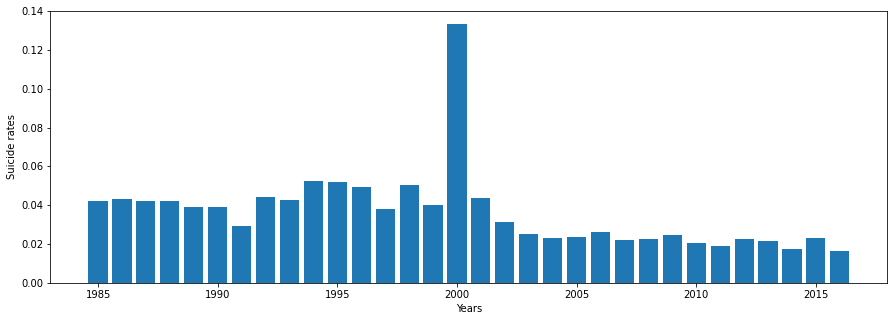

In [35]:
#plotting for the female suicide cases scross different years on overall
dfg = df2.loc[df2['Sex'] == 'female']
plt.figure(figsize=(15,5))
plt.bar(dfg.Year, dfg.Suicide_rate)
plt.xlabel('Years')
plt.ylabel('Suicide rates')

Text(0, 0.5, 'Suicide rates')

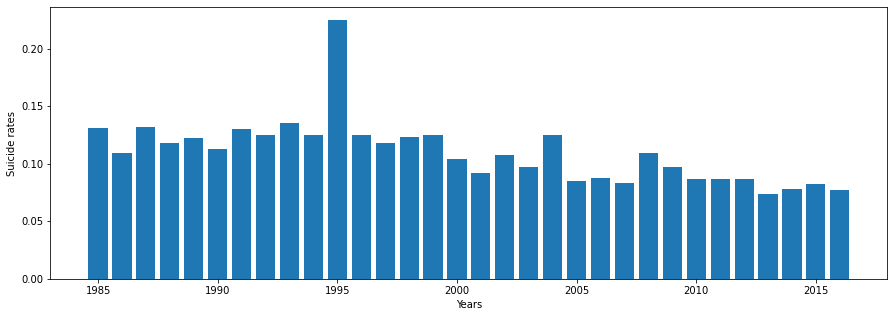

In [36]:
#plotting for the male suicide cases scross different years on overall
dfp = df2.loc[df2['Sex'] == 'male']
plt.figure(figsize=(15,5))
plt.bar(dfp.Year, dfp.Suicide_rate)
plt.xlabel('Years')
plt.ylabel('Suicide rates')

In [37]:
#6(a). Knowing the age group which most people commit suicide on overall
df6 = df2.groupby(['Age'])['Suicide_rate'].sum()
df6 = df6.sort_values(ascending = False)
df6.head()

Age
75+ years      30.884710
55-74 years    13.241356
25-34 years    11.979893
35-54 years     9.932451
15-24 years     9.738485
Name: Suicide_rate, dtype: float64

In [38]:
#6(b). Knowing the age group which most people commit suicide before 2000
dfzx = df2.loc[df2['Year'] < 2000]
df6 = dfzx.groupby(['Age'])['Suicide_rate'].sum()
df6 = df6.sort_values(ascending = False)
df6.head()


Age
75+ years      16.653272
25-34 years     6.258211
55-74 years     6.198198
15-24 years     5.003412
35-54 years     4.765718
Name: Suicide_rate, dtype: float64

In [39]:
#6(c). Knowing the age group which most people commit suicide after 2000
dfzx = df2.loc[df2['Year'] >= 2000]
df6 = dfzx.groupby(['Age'])['Suicide_rate'].sum()
df6 = df6.sort_values(ascending = False)
df6.head()

Age
75+ years      14.231438
55-74 years     7.043158
25-34 years     5.721682
35-54 years     5.166732
15-24 years     4.735074
Name: Suicide_rate, dtype: float64

In [40]:
#7. Finding out the year where people committed suicide the most on overall
df7 = df2.groupby(['Year'])['Suicides_no'].sum()
df7 = df7.sort_values(ascending = False)
df7.head()

Year
1995.0    16622.0
1996.0    15538.0
2001.0    15247.0
1998.0    15128.0
1999.0    14937.0
Name: Suicides_no, dtype: float64

In [41]:
#8. Finding which countries has the most suicides commited at every 100,000 on overall.
df8 = df2.groupby(['Country'])['Suicides_per_hundred_thousand_pop'].sum()
df8 = df8.sort_values(ascending = False)
df8.head()

Country
Estonia     6873.78
Bulgaria    6259.83
Croatia     5982.84
Austria     4927.68
Cuba        4591.86
Name: Suicides_per_hundred_thousand_pop, dtype: float64

Text(0, 0.5, 'Suicides_per_hundred_thousand_pop')

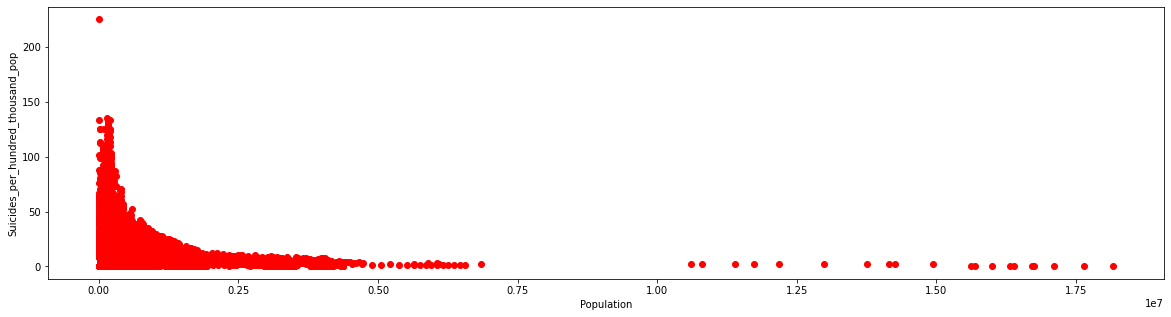

In [42]:
#Plotting for the population against Suicides_per_hundred_thousand_pop
plt.figure(figsize=(20,5))

plt.scatter(df2.Population, df2.Suicides_per_hundred_thousand_pop, color = 'red')
plt.xlabel('Population')
plt.ylabel('Suicides_per_hundred_thousand_pop')


In [43]:
#9. Finding which countries has the least suicides commited at every 100,000 on overall
dfi = df2.groupby(['Country'])['Suicides_per_hundred_thousand_pop'].sum()
dfi = dfi.sort_values(ascending = True)
dfi.head(7)

Country
Dominica                    0.00
Bosnia and Herzegovina    110.81
Cabo Verde                133.84
Canada                    136.58
Brazil                    144.86
Antigua and Barbuda       179.14
Bahamas                   344.28
Name: Suicides_per_hundred_thousand_pop, dtype: float64

In [44]:
#10. Finding which Age groups has the most suicides commited at every 100,000 on overall
df9 = df2.groupby(['Age'])['Suicides_per_hundred_thousand_pop'].sum()
df9 = df9.sort_values(ascending = False)
df9.head()

Age
75+ years      30884.56
55-74 years    13241.27
25-34 years    11979.96
35-54 years     9932.40
15-24 years     9738.53
Name: Suicides_per_hundred_thousand_pop, dtype: float64

Text(0, 0.5, 'Suicides numbers')

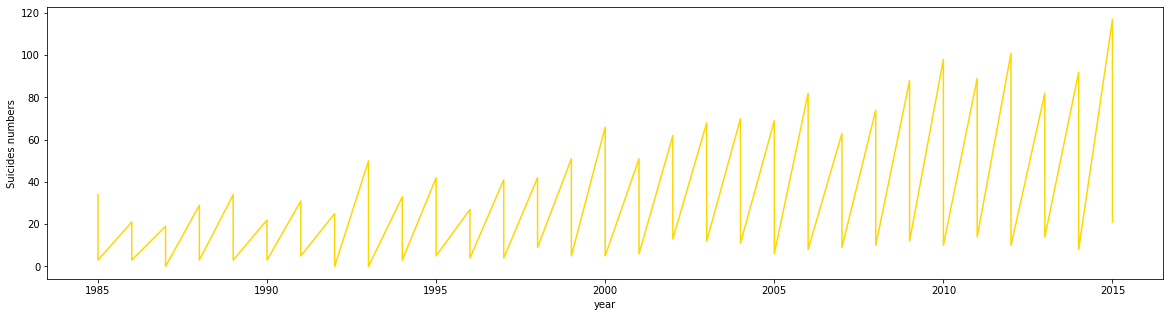

In [45]:
#plotting the 75+ years suicide rate for exapmle a country otside africa
dfx = df2.loc[df2['Age'] == '75+ years']

dfb = dfx.loc[dfx['Country'] == 'Chile']
plt.figure(figsize=(20,5))
plt.plot(dfb.Year, dfb.Suicides_no, color = 'gold')
plt.xlabel('year')
plt.ylabel('Suicides numbers')

Text(0, 0.5, 'Suicides numbers')

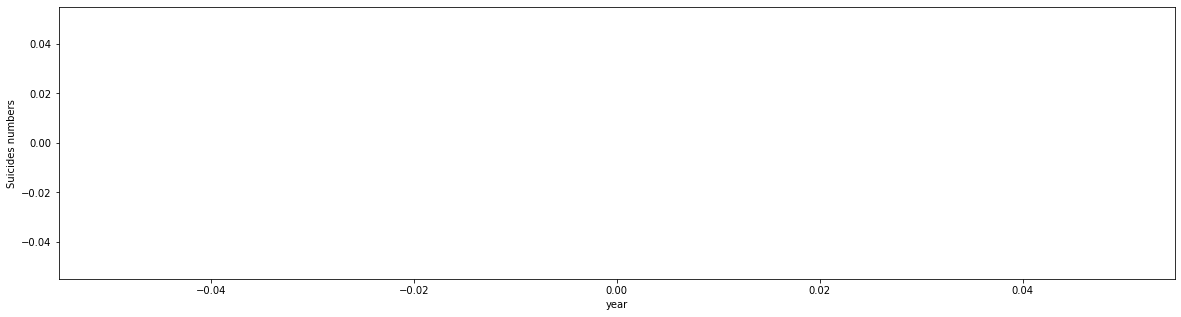

In [46]:
#plotting the suicide rate with an african country (Mauritius)
dfb = dfx.loc[dfx['Country'] == 'Mauritius']
plt.figure(figsize=(20,5))
plt.plot(dfb.Year, dfb.Suicides_no)
plt.xlabel('year')
plt.ylabel('Suicides numbers')

In [47]:
#11. does the GDP affect a countries suicide rates? if so how? no overall
df15 = df2.groupby(['Country', 'Suicides_no'])['Gdp_for_year'].sum()
df16 = df15.sort_values(ascending=False)
df16.head(10)
#countries with high gdp have the lowest suicide cases

Country    Suicides_no
Greece     0.0            7.745288e+12
Australia  4.0            2.597880e+12
Greece     11.0           2.556851e+12
Austria    2.0            2.300556e+12
Greece     14.0           2.252498e+12
Bahrain    0.0            2.222216e+12
Greece     2.0            2.148060e+12
Colombia   41.0           1.949038e+12
Greece     12.0           1.895417e+12
           1.0            1.769459e+12
Name: Gdp_for_year, dtype: float64

Text(0, 0.5, 'Suicides rate')

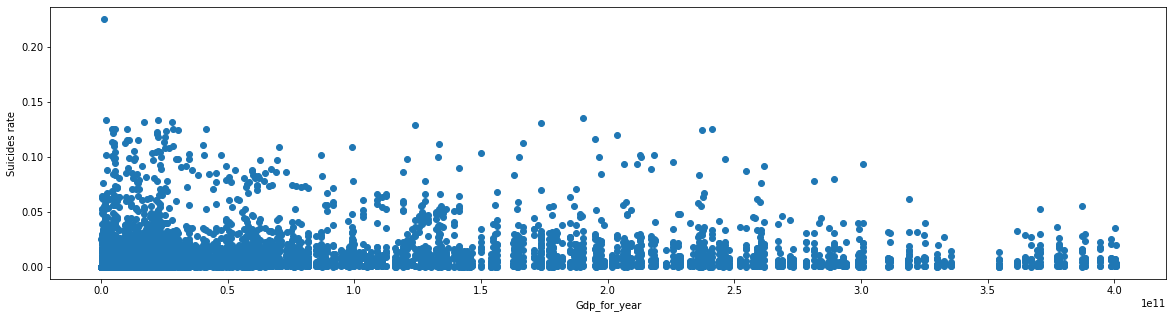

In [48]:
#plotting Gdp_for_year against suicide rate
plt.figure(figsize=(20,5))
plt.scatter(df2.Gdp_for_year, df2.Suicide_rate)
plt.xlabel('Gdp_for_year')
plt.ylabel('Suicides rate')

In [49]:
#12 how does population impact the suicide rates? on overall
df17 = df2.groupby(['Country'])['Suicide_rate', 'Gdp_per_capita'].sum()
df18 = df17.sort_values(by = 'Gdp_per_capita', ascending=False)
df18.head()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Suicide_rate,Gdp_per_capita
Country,,
Bahamas,0.344269,7130844.0
Greece,1.512228,6331212.0
Belgium,4.144869,5185010.0
Austria,4.927651,5182241.0
Cyprus,0.586233,4924944.0


Text(0, 0.5, 'Suicides rate')

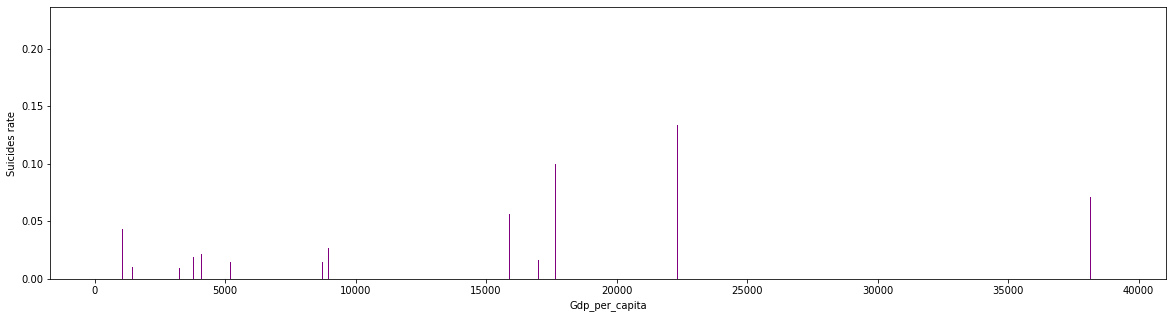

In [50]:
#plotting Gdp_per_capita against suicide_rate
plt.figure(figsize=(20,5))
plt.bar(df2.Gdp_per_capita, df2.Suicide_rate, color = 'purple')
plt.xlabel('Gdp_per_capita')
plt.ylabel('Suicides rate')